<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MARS-Dataset" data-toc-modified-id="MARS-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MARS Dataset</a></span></li></ul></div>

In [14]:
__author__ = "Louella Alva Presbitero"

import pandas as pd
import numpy as np

import sys
sys.path.append('../')

import burn
from burn.utils import *

import matplotlib.pyplot as plt 
import seaborn as sns

## MARS Dataset

In [15]:
data = pd.read_csv('../data/MARS_luminex.csv')
# data
data.head()

,Unnamed: 0,ICU_Admission_TK,ICU_ID_from_datasource,Assessment_Dates_TK,days_since_admission,Neutrophils,AF_Max,CRP_Max,White_cell_count_Max,PG.ML.A7.IL6,LLOD.A7.IL6,LLOQ.A7.IL6,PG.ML.B7.IL10,LLOD.B7.IL10,LLOQ.B7.IL10
0,1,1004,7461,NaN,0,NaN,NaN,11.0,15.9,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1004,7461,1008.0,1,NaN,93.0,16.0,15.9,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1004,7461,1009.0,2,NaN,NaN,144.0,10.6,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1004,7461,1010.0,3,NaN,NaN,404.0,10.8,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1004,7461,1011.0,4,NaN,NaN,248.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_survival = pd.read_csv('../data/ICU_survival.csv')
df_survival.head()
df_survival = df_survival.drop_duplicates()

critical = len(df_survival[df_survival['death_in_ICU'] == 1])
non_critical = len(df_survival[df_survival['death_in_ICU'] == 0])

print ('Total Patients: ', critical + non_critical)
print ('Critical Patients: ', critical)
print ('Non-Critical Patients: ', non_critical)

100*critical/(critical + non_critical)

Total Patients:  1420
Critical Patients:  364
Non-Critical Patients:  1056


25.633802816901408

In [17]:
df = data.merge(df_survival[['ICU_ID_from_datasource', 'death_in_ICU']], on='ICU_ID_from_datasource')

df_critical = df[df['death_in_ICU'] == 1]
df_non_critical = df[df['death_in_ICU'] == 0]

In [18]:
def plot_cells(cell):
    x = 'days_since_admission'
    fig, ax = plt.subplots()
    df_non_critical[[cell, x]].plot(y=cell, x=x,
                                    ax=ax, label='Non-Critical', color='#818381', marker='+')
    df_critical[[cell, x]].plot(y=cell,
                                x=x, ax=ax, label='Critical', color='#ED2025', alpha=0.5, marker='x')
    plt.title(cell)

In [19]:
def plot_combined(cell, x='days_since_admission', agg='median'):
    fig = plt.figure()
    df_non = group_dataframes(df_non_critical, cell, x)
    df_crit = group_dataframes(df_critical, cell, x)
    plt.errorbar(
        df_non.index, df_non[agg], yerr=df_non['std'], color='#818381', label='Non-critical', marker='+', alpha=1)
    plt.errorbar(df_crit.index, df_crit[agg],
                 yerr=df_crit['std'], color='#ED2025', label='Critical', marker='x', alpha=0.5)
    plt.ylim(ymin=0)
    plt.legend()
    plt.title(cell)

In [20]:
# def put_together(df, cell, time):
#     df = df[[cell, time]]
#     df_grouped = df.groupby('days_since_admission').agg(
#         ['mean', 'std']).reset_index()
#     df_grouped.columns = [time, 'mean', 'std']
#     return df_grouped

In [21]:
def plot_distribution(cell):
    fig = plt.figure()
    sns.distplot(df_non_critical[cell],
                 bins=100,
                 kde=True,
                 color='#818381',
                 label='Non-critical',
                 hist_kws={"linewidth": 15, 'alpha': 1})

    sns.distplot(df_critical[cell],
                 bins=100,
                 kde=True,
                 color='#ED2025',
                 label='Critical',
                 hist_kws={"linewidth": 15, 'alpha': 0.5})
    plt.legend()

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

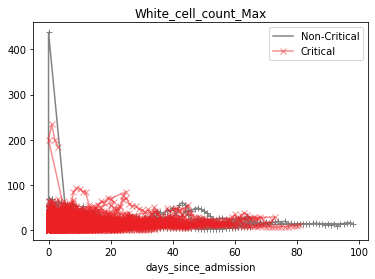

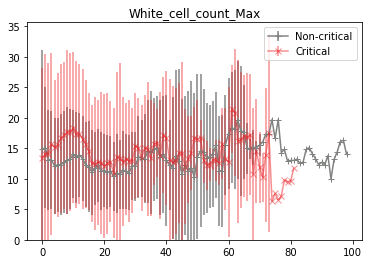

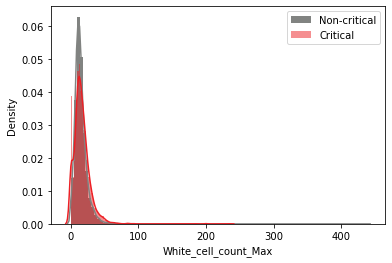

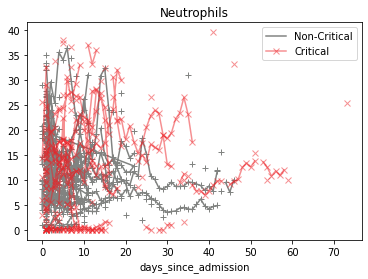

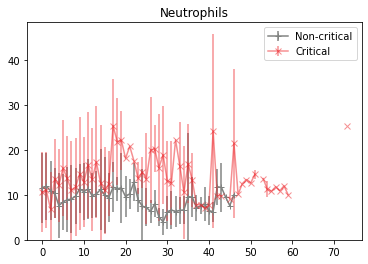

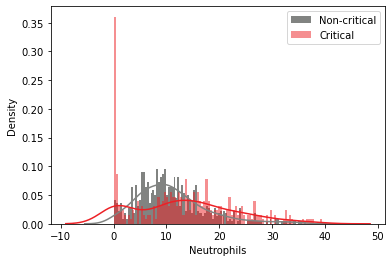

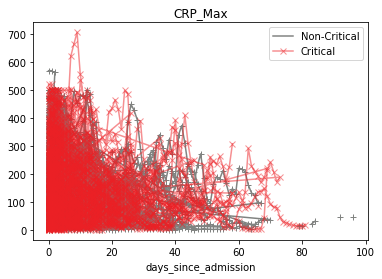

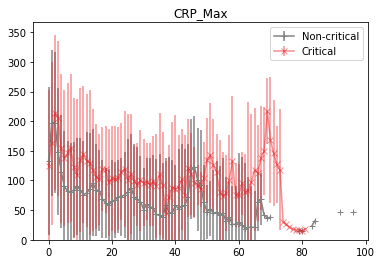

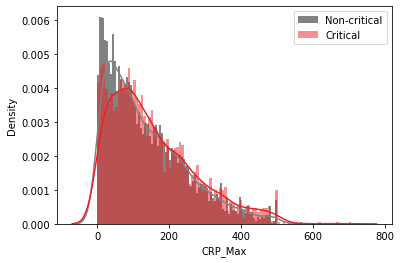

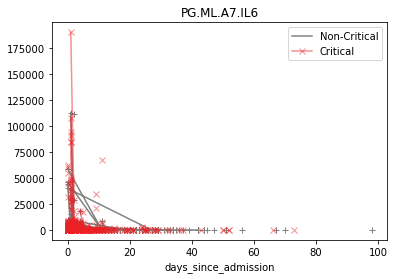

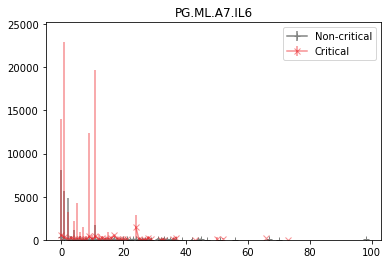

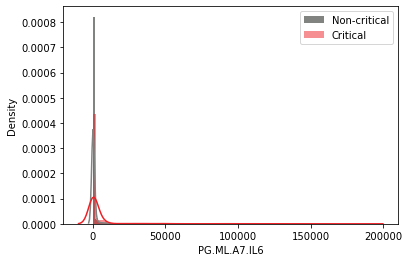

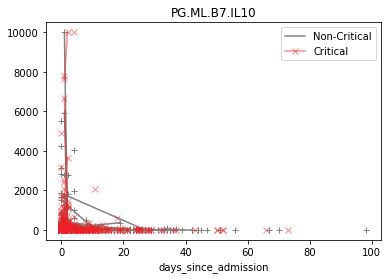

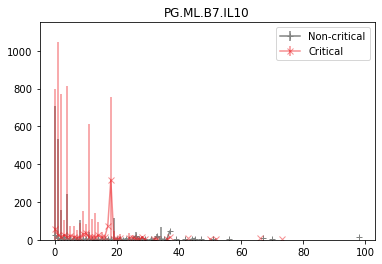

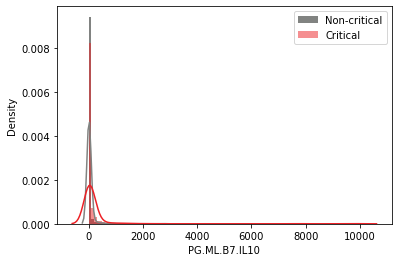

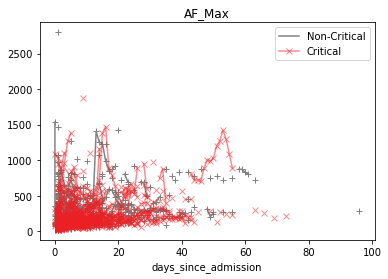

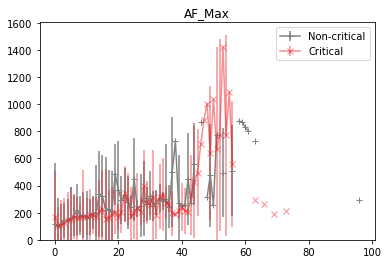

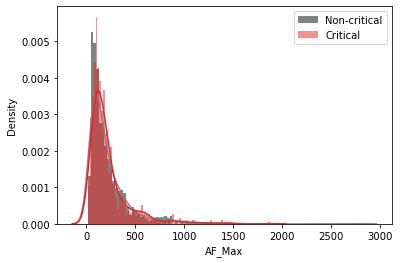

In [22]:
cells = ['White_cell_count_Max', 'Neutrophils', 'CRP_Max', 'PG.ML.A7.IL6', 'PG.ML.B7.IL10', 'AF_Max']

for cell in cells:
    plot_cells(cell)
    plot_combined(cell)
    plot_distribution(cell)

In [195]:
data = '../data/patient_blood_edit.xlsx'

In [3]:
df= pd.read_excel(data)

In [4]:
df.columns

Index(['Type', 'Patient # PBD', 'Day', 'RANTES (74)', 'CTACK (62)',
       'IL-21 (52)', 'IL-23 (54)', 'IL-33 (45)', 'IL-17F (19)', 'IL-22 (43)',
       'MIP-3a (28)', 'GROa (22)', 'IFN-a2 (25)', 'IFN-y (26)', 'IL-10 (42)',
       'IL-12p40 (43)', 'IL-12p70 (44)', 'IL-13 (46)', 'IL-17A (48)',
       'IL-18 (54)', 'IL-1a (27)', 'IL-1b (28)', 'IL-2 (30)', 'IL-4 (34)',
       'IL-5 (35)', 'IL-6 (36)', 'IL-8 (38)', 'IL-9 (39)', 'IP-10 (57)',
       'MCP-1 (61)', 'MIP-1a (66)', 'MIP-1b (67)', 'TNF-a (76)'],
      dtype='object')

In [5]:
df_clean = df.drop(['Type'], axis=1)
patients = list(set(df_clean['Patient # PBD']))

df_clean = df_clean.replace('OOR >', np.nan)
df_clean = df_clean.replace('OOR <', np.nan)

In [6]:
df_clean.columns

Index(['Patient # PBD', 'Day', 'RANTES (74)', 'CTACK (62)', 'IL-21 (52)',
       'IL-23 (54)', 'IL-33 (45)', 'IL-17F (19)', 'IL-22 (43)', 'MIP-3a (28)',
       'GROa (22)', 'IFN-a2 (25)', 'IFN-y (26)', 'IL-10 (42)', 'IL-12p40 (43)',
       'IL-12p70 (44)', 'IL-13 (46)', 'IL-17A (48)', 'IL-18 (54)',
       'IL-1a (27)', 'IL-1b (28)', 'IL-2 (30)', 'IL-4 (34)', 'IL-5 (35)',
       'IL-6 (36)', 'IL-8 (38)', 'IL-9 (39)', 'IP-10 (57)', 'MCP-1 (61)',
       'MIP-1a (66)', 'MIP-1b (67)', 'TNF-a (76)'],
      dtype='object')

<AxesSubplot:xlabel='Day'>

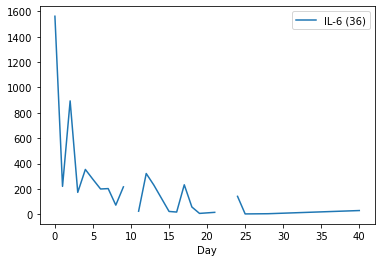

In [25]:
df_clean[['IL-6 (36)', 'Day']].groupby('Day').mean().plot()

Patient # PBD
100         AxesSubplot(0.125,0.125;0.775x0.755)
102         AxesSubplot(0.125,0.125;0.775x0.755)
103         AxesSubplot(0.125,0.125;0.775x0.755)
105         AxesSubplot(0.125,0.125;0.775x0.755)
107         AxesSubplot(0.125,0.125;0.775x0.755)
110         AxesSubplot(0.125,0.125;0.775x0.755)
91          AxesSubplot(0.125,0.125;0.775x0.755)
94          AxesSubplot(0.125,0.125;0.775x0.755)
95          AxesSubplot(0.125,0.125;0.775x0.755)
96          AxesSubplot(0.125,0.125;0.775x0.755)
98          AxesSubplot(0.125,0.125;0.775x0.755)
99          AxesSubplot(0.125,0.125;0.775x0.755)
C1          AxesSubplot(0.125,0.125;0.775x0.755)
C2          AxesSubplot(0.125,0.125;0.775x0.755)
V10         AxesSubplot(0.125,0.125;0.775x0.755)
V15         AxesSubplot(0.125,0.125;0.775x0.755)
V2          AxesSubplot(0.125,0.125;0.775x0.755)
V4          AxesSubplot(0.125,0.125;0.775x0.755)
standard    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

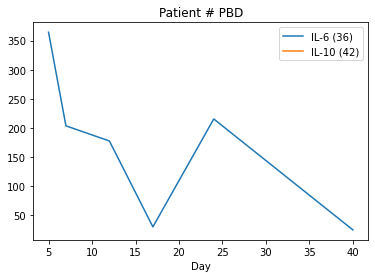

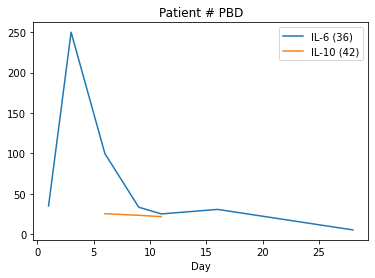

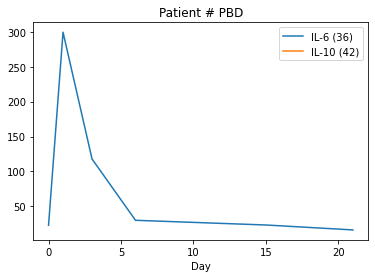

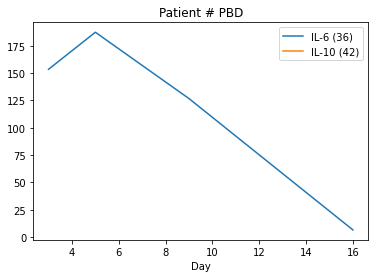

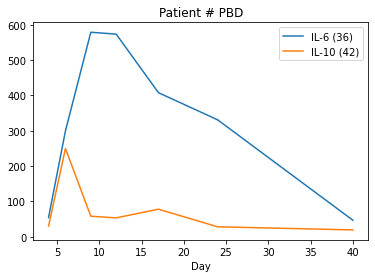

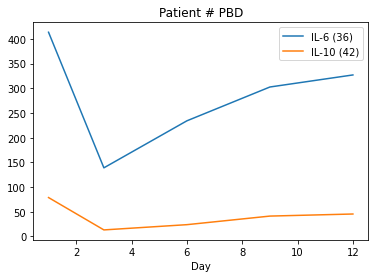

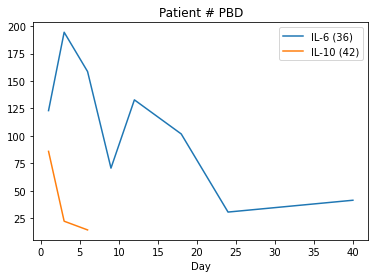

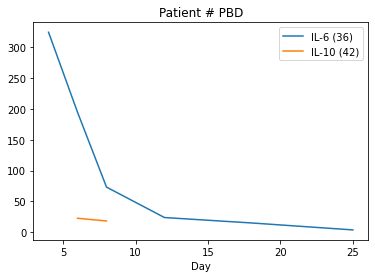

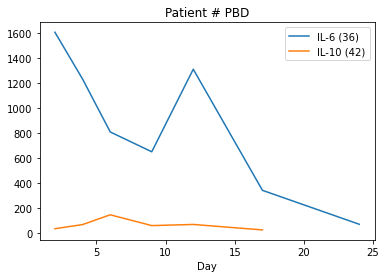

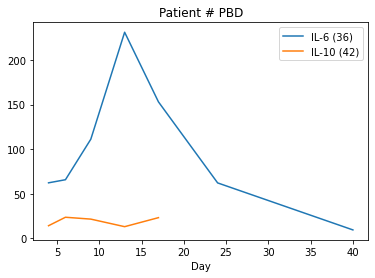

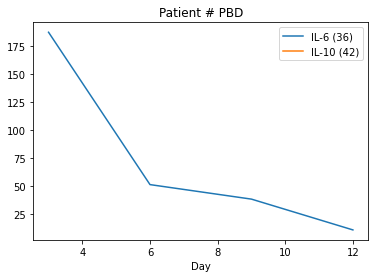

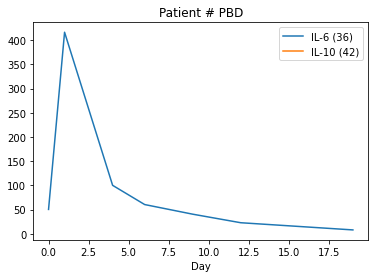

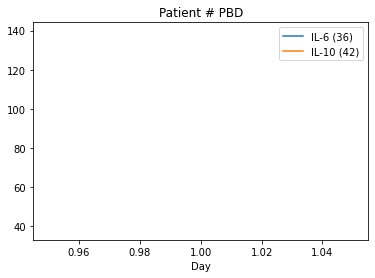

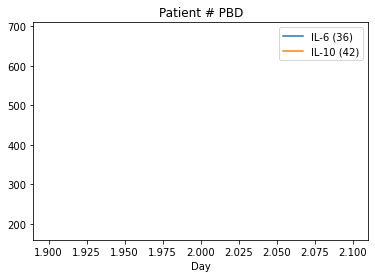

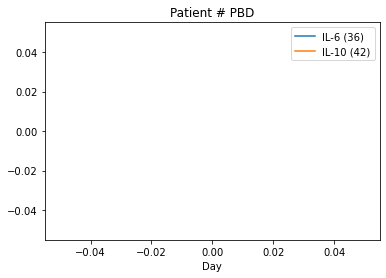

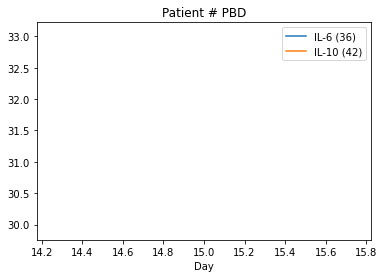

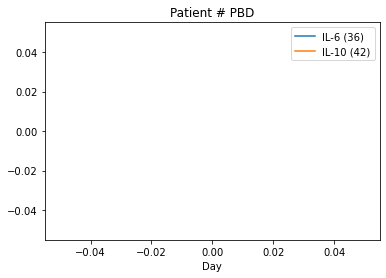

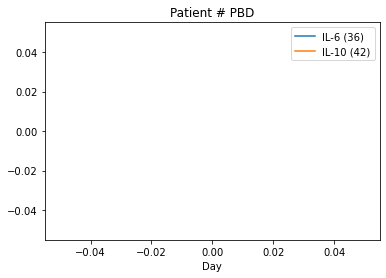

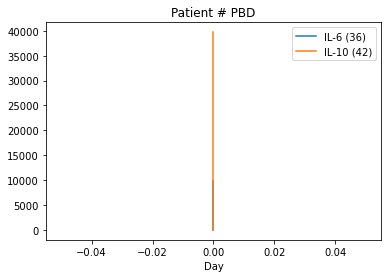

In [8]:
df_clean[['Patient # PBD', 'IL-6 (36)', 'IL-10 (42)', 'Day']].groupby('Patient # PBD').plot(x='Day', title = 'Patient # PBD')
# plt.legend()

<AxesSubplot:xlabel='Day'>

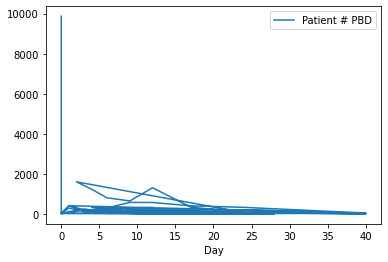

In [21]:
df_clean[['Patient # PBD', 'IL-6 (36)', 'Day']].plot(x='Day', y='IL-6 (36)', label='Patient # PBD')

In [38]:
df_clean.columns

Index(['Patient # PBD', 'Day', 'RANTES (74)', 'CTACK (62)', 'IL-21 (52)',
       'IL-23 (54)', 'IL-33 (45)', 'IL-17F (19)', 'IL-22 (43)', 'MIP-3a (28)',
       'GROa (22)', 'IFN-a2 (25)', 'IFN-y (26)', 'IL-10 (42)', 'IL-12p40 (43)',
       'IL-12p70 (44)', 'IL-13 (46)', 'IL-17A (48)', 'IL-18 (54)',
       'IL-1a (27)', 'IL-1b (28)', 'IL-2 (30)', 'IL-4 (34)', 'IL-5 (35)',
       'IL-6 (36)', 'IL-8 (38)', 'IL-9 (39)', 'IP-10 (57)', 'MCP-1 (61)',
       'MIP-1a (66)', 'MIP-1b (67)', 'TNF-a (76)'],
      dtype='object')

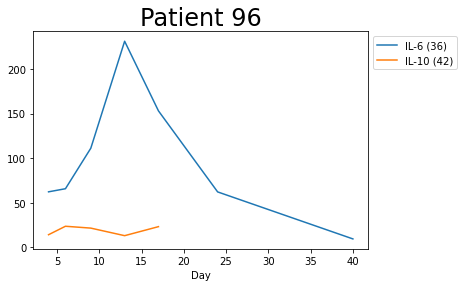

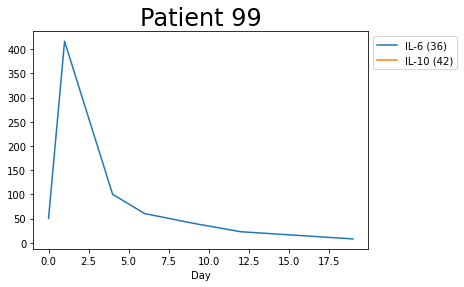

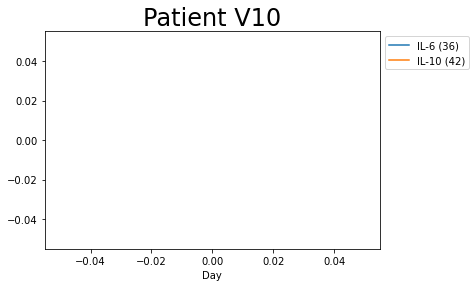

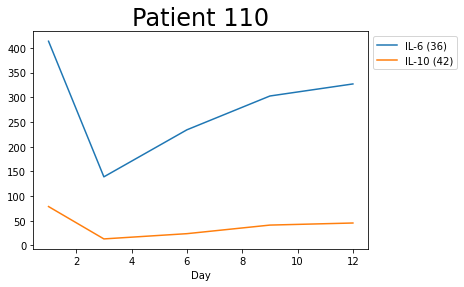

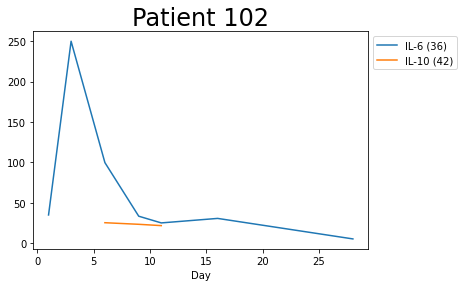

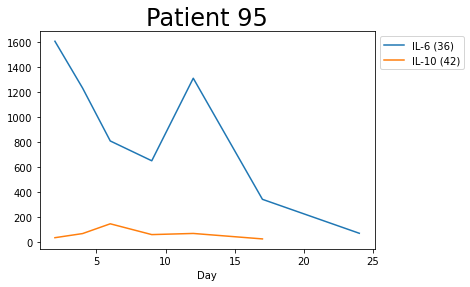

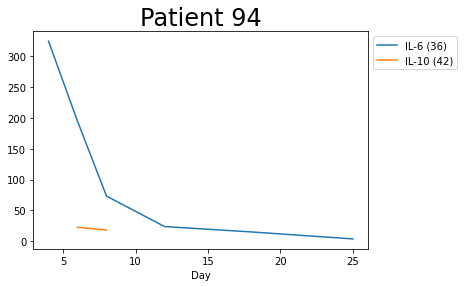

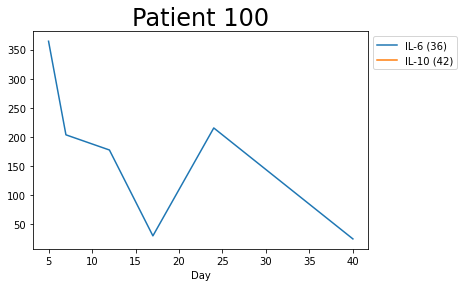

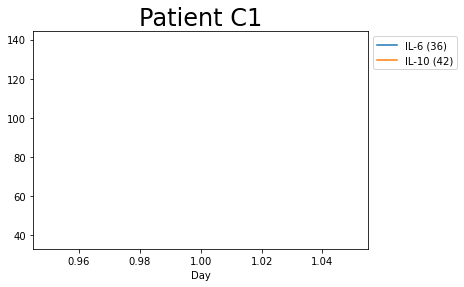

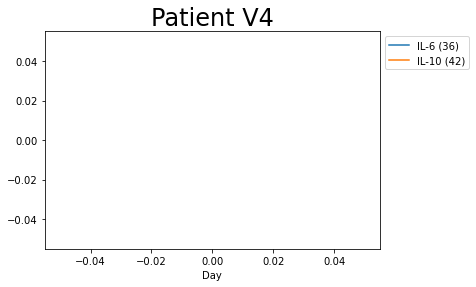

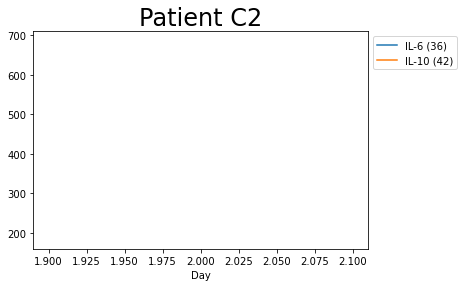

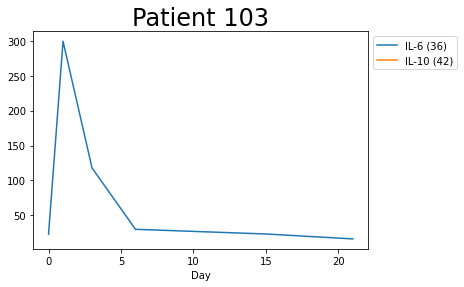

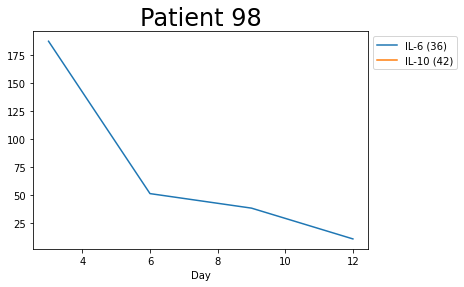

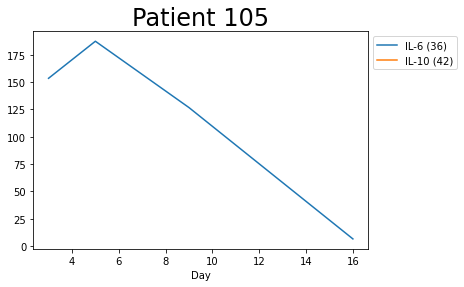

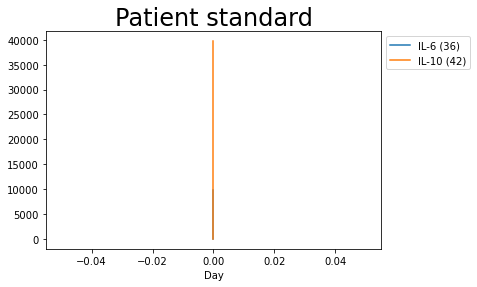

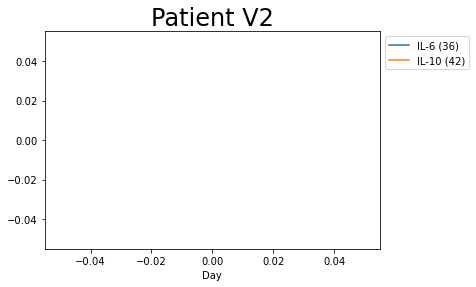

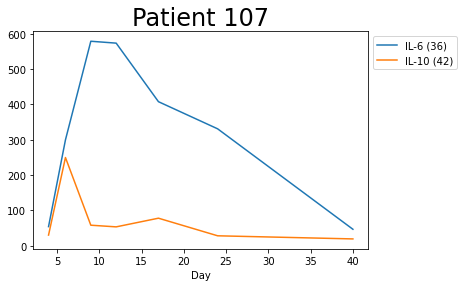

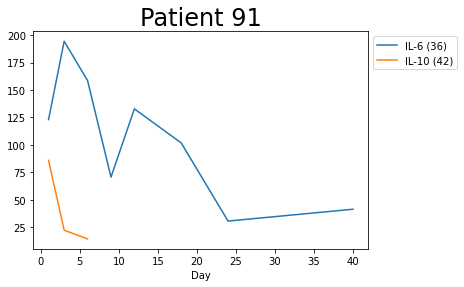

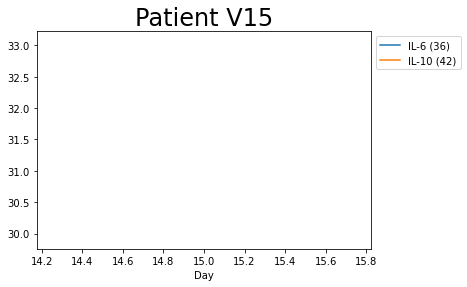

In [11]:
import matplotlib.pylab as plt

df_clean_ = df_clean[['Patient # PBD', 'Day', 'IL-6 (36)', 'IL-10 (42)']]

patients = set(df_clean['Patient # PBD'])
for patient in patients:
    df_clean_[df_clean_['Patient # PBD'] == patient].plot(x='Day')
    plt.title(f'Patient {patient}', fontsize=24)
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
